In [18]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [21]:
r = requests.get('http://localhost/api/v1/scfa/dividend')
x = r.json()
df = pd.DataFrame(x['data'])
df.head()

,symbol,title,published_date,company_name,type,floor,record_date,exright_date,payout_date,id
0,PAN,"PAN: chia cổ tức bằng tiền, tỉ lệ 0.05 (500 đồ...",2025-08-18T17:00:00,Công ty Cổ phần Tập đoàn PAN,cash,HOSE,2025-08-28T17:00:00,2025-08-27T17:00:00,1.757869e+09,68a5669e05fc408148bd2992
1,MIG,"MIG: chia cổ tức bằng tiền, tỉ lệ 0.05 (500 đồ...",2025-08-18T17:00:00,Tổng Công ty Cổ phần Bảo Hiểm Quân Đội,cash,HOSE,2025-08-24T17:00:00,2025-08-21T17:00:00,1.757869e+09,68a5669e05fc408148bd29a2
2,GDA,"GDA: trả cổ tức bằng cổ phiếu, tỉ lệ 0.3 (phát...",2025-08-18T17:00:00,Công ty cổ phần Tôn Đông Á,stock,UPCOM,2025-08-26T17:00:00,2025-08-25T17:00:00,NaN,68a5669e05fc408148bd2998
3,BLN,"BLN: chia cổ tức bằng tiền, tỉ lệ 0.06 (600 đồ...",2025-08-18T17:00:00,Công ty cổ phần Vận tải và dịch vụ Liên Ninh,cash,UPCOM,2025-08-27T17:00:00,2025-08-26T17:00:00,1.759079e+09,68a5669e05fc408148bd2997
4,DNA,"DNA: chia cổ tức bằng tiền, tỉ lệ 0.15 (1,500 ...",2025-08-18T17:00:00,Công ty Cổ phần Điện nước An Giang,cash,UPCOM,2025-08-27T17:00:00,2025-08-26T17:00:00,1.757869e+09,68a5669e05fc408148bd2996


                                               title  ratio
0  PAN: chia cổ tức bằng tiền, tỉ lệ 0.05 (500 đồ...   0.05
1  MIG: chia cổ tức bằng tiền, tỉ lệ 0.05 (500 đồ...   0.05
2  GDA: trả cổ tức bằng cổ phiếu, tỉ lệ 0.3 (phát...   0.30
3  BLN: chia cổ tức bằng tiền, tỉ lệ 0.06 (600 đồ...   0.06
4  DNA: chia cổ tức bằng tiền, tỉ lệ 0.15 (1,500 ...   0.15
5  CAT: chia cổ tức bằng tiền, tỉ lệ 0.2 (2,000 đ...   0.20
6  ISH: chia cổ tức bằng tiền, tỉ lệ 0.1 (1,000 đ...   0.10
7  GSM: chia cổ tức bằng tiền, tỉ lệ 0.2 (2,000 đ...   0.20
8  TD6: chia cổ tức bằng tiền, tỉ lệ 0.03 (300 đồ...   0.03
9  MIG: trả cổ tức bằng cổ phiếu, tỉ lệ 0.05 (phá...   0.05
Top companies by number of dividend payments:
symbol
THG    35
HTC    34
ADP    33
SEB    32
QNS    31
DRL    30
VNM    29
DNH    27
FPT    26
APF    26
Name: count, dtype: int64


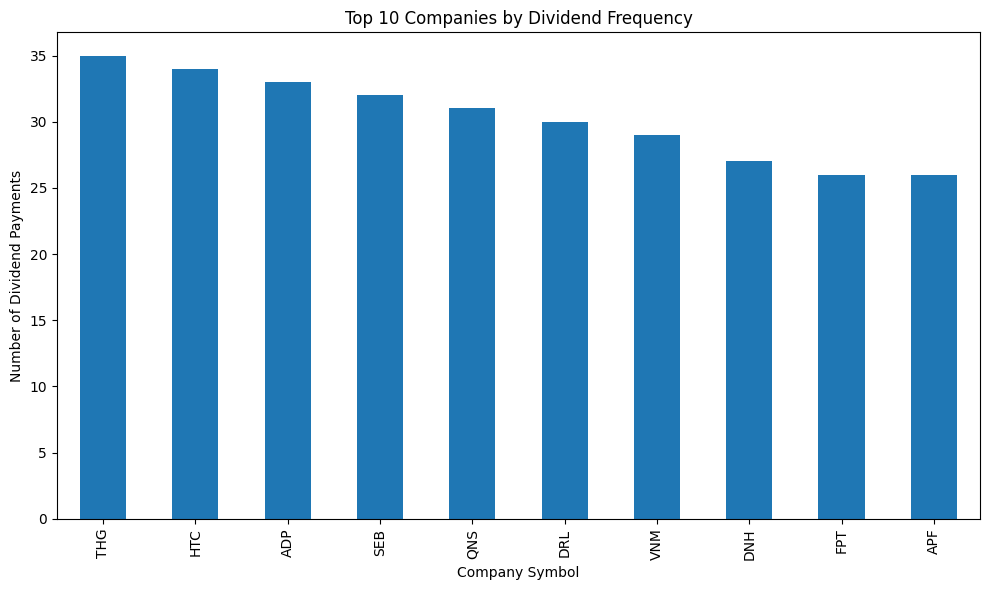

In [ ]:
# Count how many times each company (symbol) paid a dividend
dividend_counts = df['symbol'].value_counts()

# Display the top companies by dividend frequency
print("Top companies by number of dividend payments:")
print(dividend_counts.head(10))
# Plot the top 10 companies with the most frequent dividends
dividend_counts.head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Companies by Dividend Frequency')
plt.xlabel('Company Symbol')
plt.ylabel('Number of Dividend Payments')
plt.tight_layout()
plt.show()

Top 10 companies by number of cash dividend payments:
symbol
HTC    33
ADP    32
SEB    31
DRL    30
THG    28
QNS    28
DNH    27
VNM    27
TTD    26
PMC    25
Name: count, dtype: int64


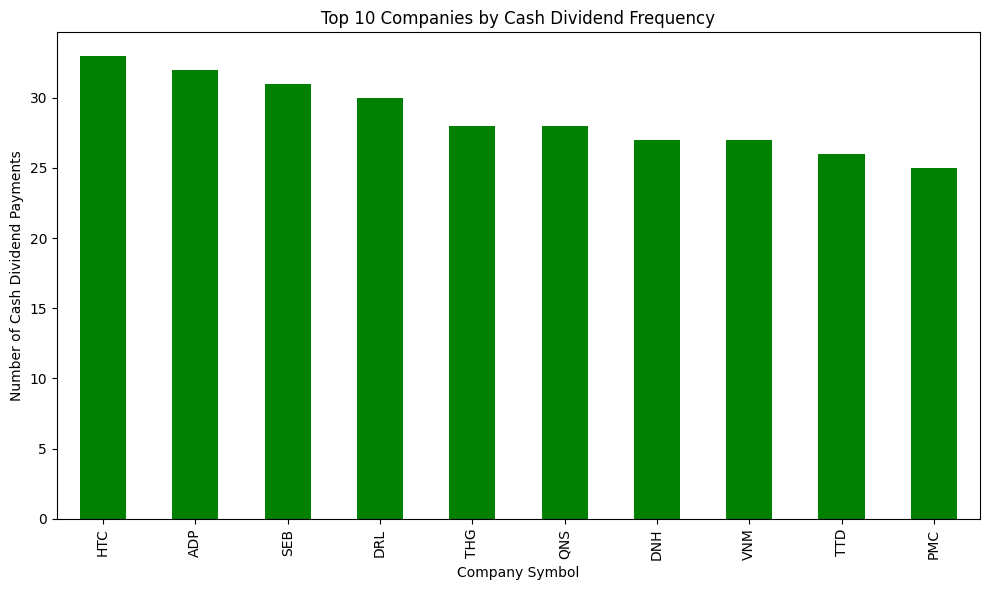

In [23]:
# Filter for cash dividends if there is a 'type' or similar column
if 'type' in df.columns:
    cash_dividends = df[df['type'].str.lower() == 'cash']
else:
    cash_dividends = df  # If no type column, use all dividends

# Count how many times each company paid a cash dividend
cash_dividend_counts = cash_dividends['symbol'].value_counts()

# Display the top 10 companies by cash dividend frequency
print("Top 10 companies by number of cash dividend payments:")
print(cash_dividend_counts.head(10))

# Plot the top 10 companies with the most frequent cash dividends
cash_dividend_counts.head(10).plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Top 10 Companies by Cash Dividend Frequency')
plt.xlabel('Company Symbol')
plt.ylabel('Number of Cash Dividend Payments')
plt.tight_layout()
plt.show()

Number of dividends by type:
type
cash     9558
stock    1271
issue     747
Name: symbol, dtype: int64


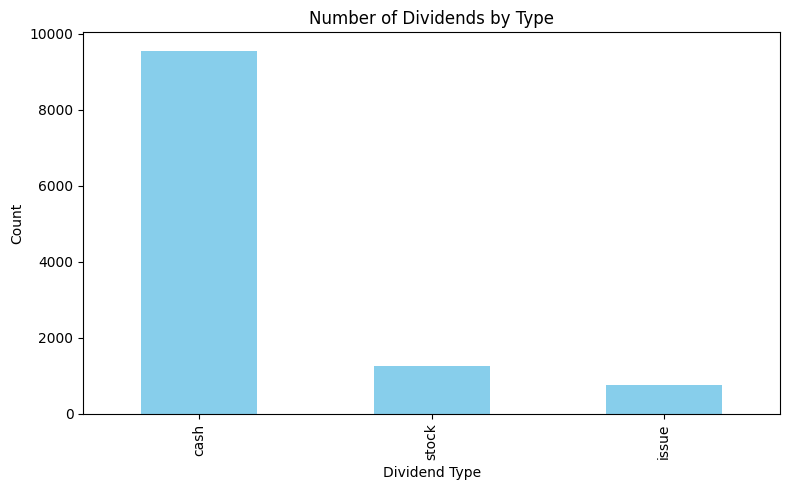

In [24]:
# Group dividend counts by type and display the result
if 'type' in df.columns:
    type_counts = df.groupby('type')['symbol'].count().sort_values(ascending=False)
    print("Number of dividends by type:")
    print(type_counts)
    # Optional: plot the result
    type_counts.plot(kind='bar', figsize=(8, 5), color='skyblue')
    plt.title('Number of Dividends by Type')
    plt.xlabel('Dividend Type')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print("No 'type' column found in the data.")

Top 10 companies by dividend payments for each type:
       type symbol  count
539    cash    HTC     33
20     cash    ADP     32
970    cash    SEB     31
334    cash    DRL     30
912    cash    QNS     28
1091   cash    THG     28
311    cash    DNH     27
1286   cash    VNM     27
1157   cash    TTD     26
846    cash    PMC     25
1662  issue    SAV      8
1686  issue    SSB      8
1704  issue    TCM      8
1760  issue    VIB      8
1489  issue    FTS      7
1603  issue    NHH      6
1676  issue    SHS      6
1741  issue    TVB      6
1744  issue    TVS      6
1395  issue    BVB      5
1802  stock    ACB     10
2019  stock    MBB     10
2071  stock    PDR      9
2127  stock    SHB      9
2235  stock    VIX      9
1815  stock    APF      8
1826  stock    BCF      8
1838  stock    BSI      8
1955  stock    HDC      8
1996  stock    KDH      8


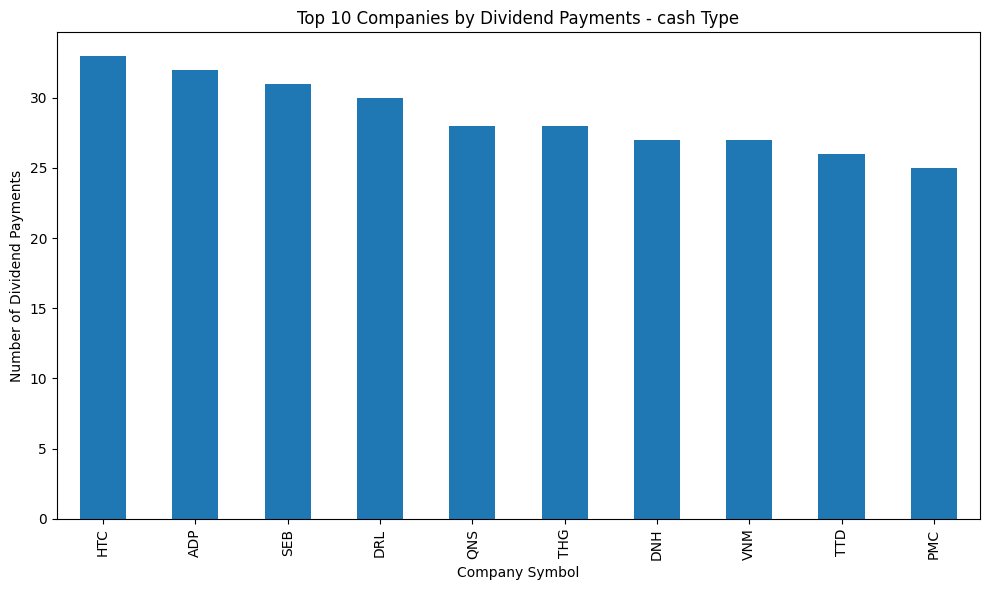

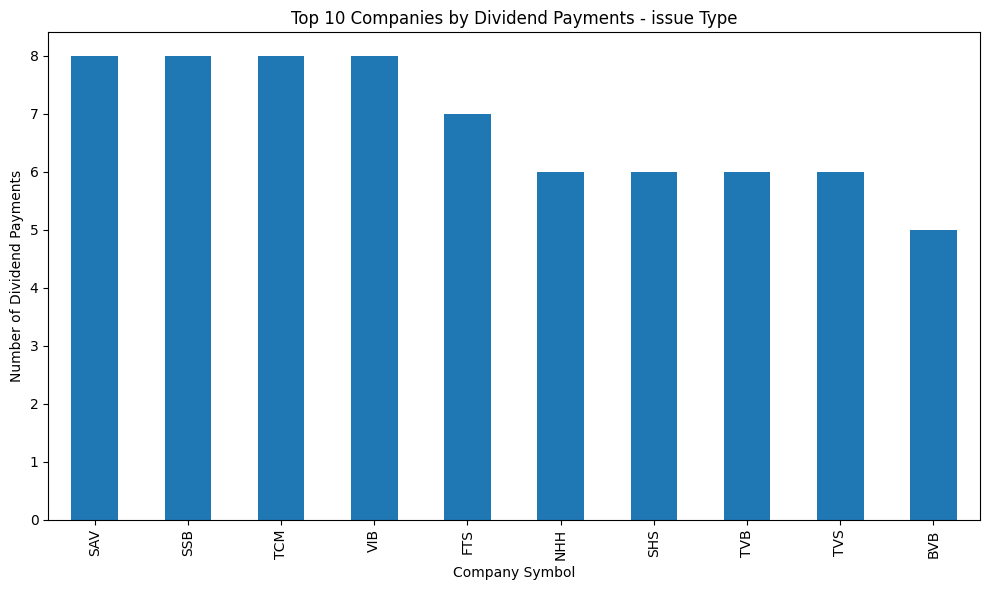

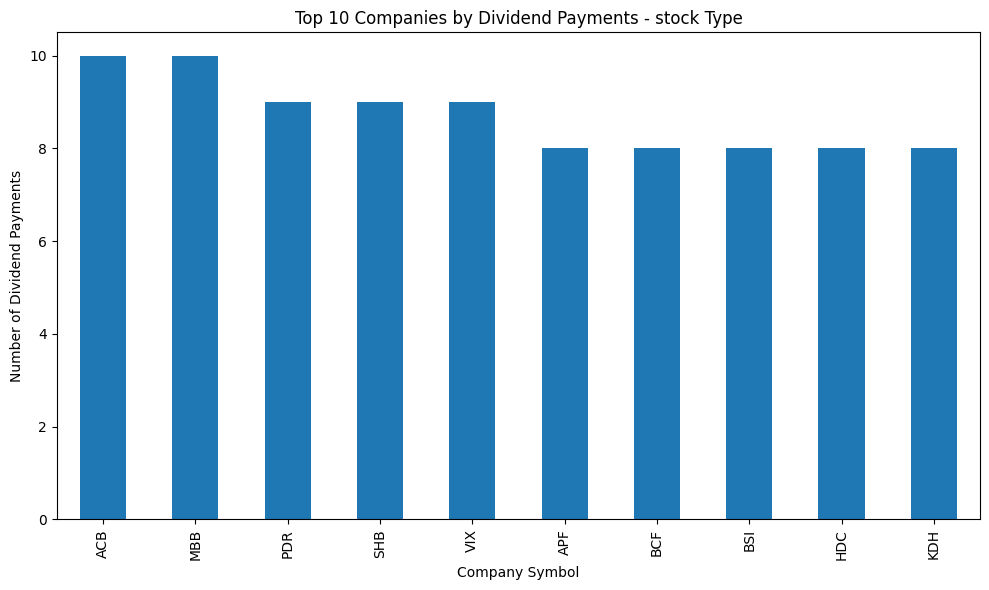

In [25]:
# Top 10 companies by number of dividend payments for each dividend type
if 'type' in df.columns:
    top10_by_type_stock = (
        df.groupby(['type', 'symbol'])
        .size()
        .reset_index(name='count')
        .sort_values(['type', 'count'], ascending=[True, False])
        .groupby('type')
        .head(10)
    )
    print("Top 10 companies by dividend payments for each type:")
    print(top10_by_type_stock)
    # Plot for each type
    for dtype in top10_by_type_stock['type'].unique():
        subset = top10_by_type_stock[top10_by_type_stock['type'] == dtype]
        subset.plot(
            x='symbol', y='count', kind='bar', legend=False, figsize=(10, 6),
            title=f'Top 10 Companies by Dividend Payments - {dtype} Type'
        )
        plt.xlabel('Company Symbol')
        plt.ylabel('Number of Dividend Payments')
        plt.tight_layout()
        plt.show()
else:
    print("No 'type' column found in the data.")

Analytics: Dividend Distribution by Quarter and Year
Số công ty trả cổ tức theo từng quý mỗi năm

Thống kê này cho biết trong mỗi quý của từng năm, có bao nhiêu công ty thực hiện chi trả cổ tức.
Giúp nhận diện các giai đoạn cao điểm (quý nào nhiều công ty trả cổ tức nhất) và xu hướng theo thời gian.
Có thể dùng để xác định mùa vụ cổ tức trên thị trường.
Số công ty trả cổ tức theo từng năm

Cho biết tổng số công ty thực hiện chi trả cổ tức trong từng năm.
Dễ dàng so sánh mức độ tham gia trả cổ tức của các công ty qua các năm.
Phản ánh sự ổn định hoặc biến động của chính sách cổ tức toàn thị trường.
Số lần trả cổ tức của từng công ty theo năm

Thống kê này cho biết từng công ty trả cổ tức bao nhiêu lần trong một năm.
Giúp nhận diện các công ty có chính sách cổ tức đều đặn, thường xuyên.
Có thể dùng để lựa chọn các cổ phiếu phù hợp với chiến lược đầu tư cổ tức.
Ý nghĩa thực tiễn:

Nhà đầu tư có thể sử dụng các thống kê này để xác định các công ty trả cổ tức đều đặn, lựa chọn thời điểm đầu tư phù hợp với mùa vụ cổ tức.
Doanh nghiệp có thể tham khảo để điều chỉnh chính sách cổ tức, tăng sức hấp dẫn với nhà đầu tư.
Thống kê theo quý và năm giúp đánh giá xu hướng chung của thị trường về chính sách cổ tức.
Gợi ý trực quan hóa:

Biểu đồ cột số lượng công ty trả cổ tức theo từng quý/năm.
Biểu đồ heatmap thể hiện mức độ tập trung trả cổ tức theo quý và năm.
Biểu đồ line thể hiện xu hướng số công ty trả cổ tức qua các năm.

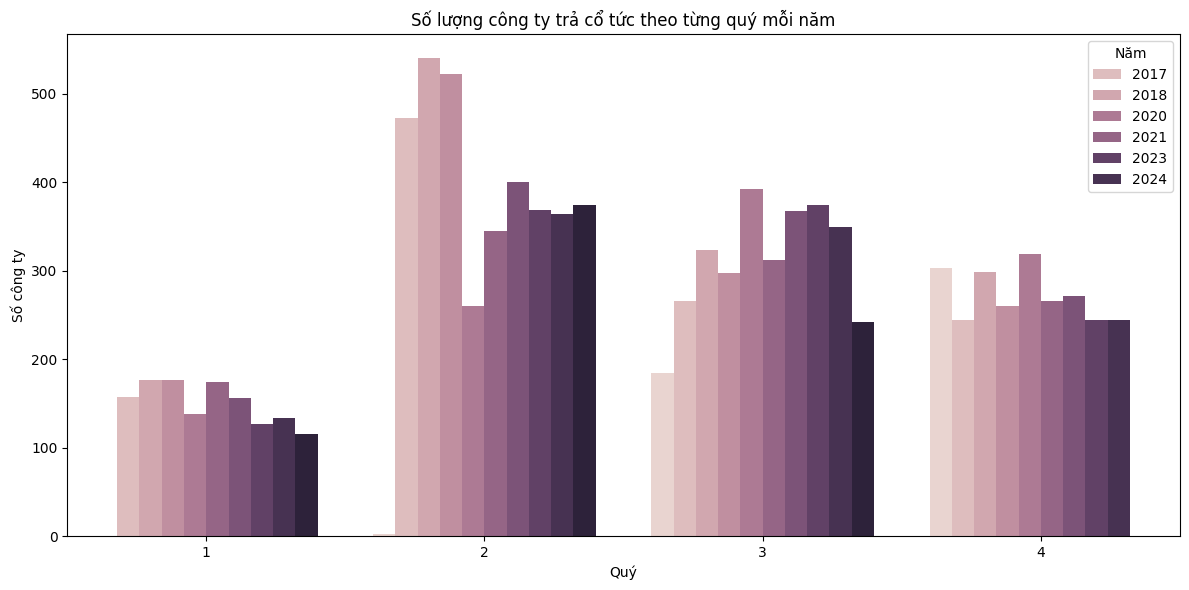

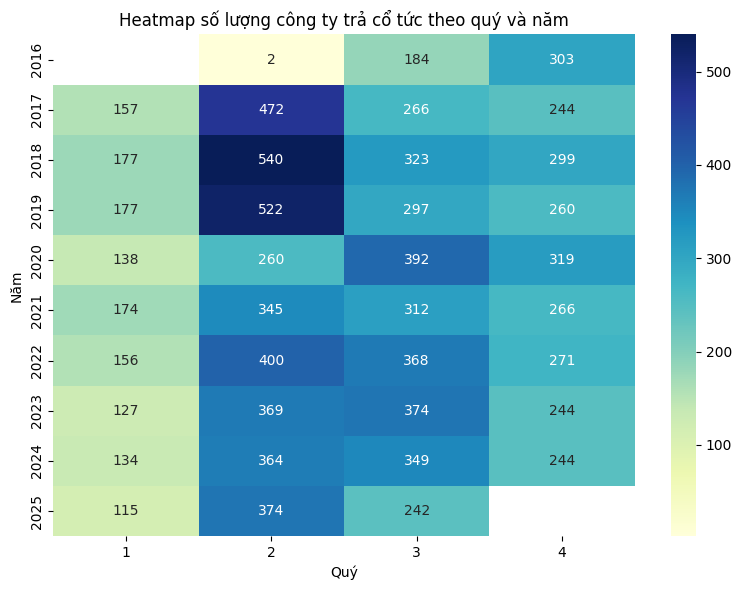

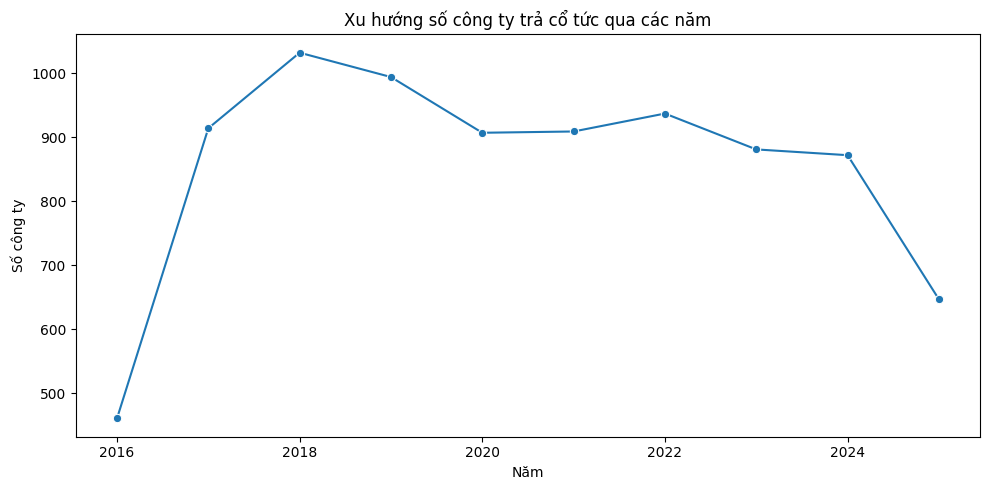

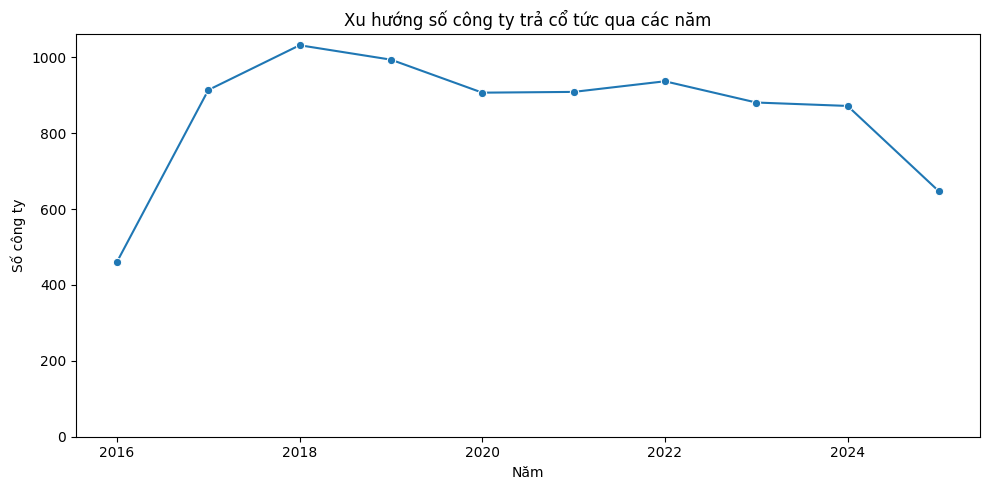

In [54]:
import seaborn as sns

# Đảm bảo cột exright_date đã được chuyển sang datetime
df['exright_date'] = pd.to_datetime(df['exright_date'])
df['year'] = df['exright_date'].dt.year
df['quarter'] = df['exright_date'].dt.quarter

# 1. Biểu đồ cột: Số lượng công ty trả cổ tức theo từng quý/năm
companies_by_quarter = df.groupby(['year', 'quarter'])['symbol'].nunique().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=companies_by_quarter, x='quarter', y='symbol', hue='year')
plt.title('Số lượng công ty trả cổ tức theo từng quý mỗi năm')
plt.xlabel('Quý')
plt.ylabel('Số công ty')
plt.legend(title='Năm')
plt.tight_layout()
plt.show()

# 2. Biểu đồ heatmap: Mức độ tập trung trả cổ tức theo quý và năm
pivot = companies_by_quarter.pivot(index='year', columns='quarter', values='symbol')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Heatmap số lượng công ty trả cổ tức theo quý và năm')
plt.xlabel('Quý')
plt.ylabel('Năm')
plt.tight_layout()
plt.show()

# 3. Biểu đồ line: Xu hướng số công ty trả cổ tức qua các năm
companies_by_year = df.groupby('year')['symbol'].nunique().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=companies_by_year, x='year', y='symbol', marker='o')
plt.title('Xu hướng số công ty trả cổ tức qua các năm')
plt.xlabel('Năm')
plt.ylabel('Số công ty')
plt.tight_layout()
plt.show()

# 3. Biểu đồ line: Xu hướng số công ty trả cổ tức qua các năm ylim from 0
companies_by_year = df.groupby('year')['symbol'].nunique().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=companies_by_year, x='year', y='symbol', marker='o')
plt.title('Xu hướng số công ty trả cổ tức qua các năm')
plt.xlabel('Năm')
plt.ylabel('Số công ty')
plt.ylim(0)
plt.tight_layout()
plt.show()

                                                   title  ratio
0      PAN: chia cổ tức bằng tiền, tỉ lệ 0.05 (500 đồ...   0.05
1      MIG: chia cổ tức bằng tiền, tỉ lệ 0.05 (500 đồ...   0.05
2      GDA: trả cổ tức bằng cổ phiếu, tỉ lệ 0.3 (phát...   0.30
3      BLN: chia cổ tức bằng tiền, tỉ lệ 0.06 (600 đồ...   0.06
4      DNA: chia cổ tức bằng tiền, tỉ lệ 0.15 (1,500 ...   0.15
...                                                  ...    ...
11571  CEC: chia cổ tức bằng tiền, tỉ lệ 0.2 (2,000 đ...   0.20
11572  DT4: chia cổ tức bằng tiền, tỉ lệ 0.0505 (505 ...   0.05
11573  MTH: chia cổ tức bằng tiền, tỉ lệ 0.08 (800 đồ...   0.08
11574  CMV: chia cổ tức bằng tiền, tỉ lệ 0.05 (500 đồ...   0.05
11575  CTC: chia cổ tức bằng tiền, tỉ lệ 0.05 (500 đồ...   0.05

[11576 rows x 2 columns]
Phân phối thống kê tỉ lệ cổ tức (ratio):
count   11,576.00
mean         0.16
std          0.26
min          0.00
25%          0.06
50%          0.10
75%          0.15
max          8.00
Name: ratio, dtype: f

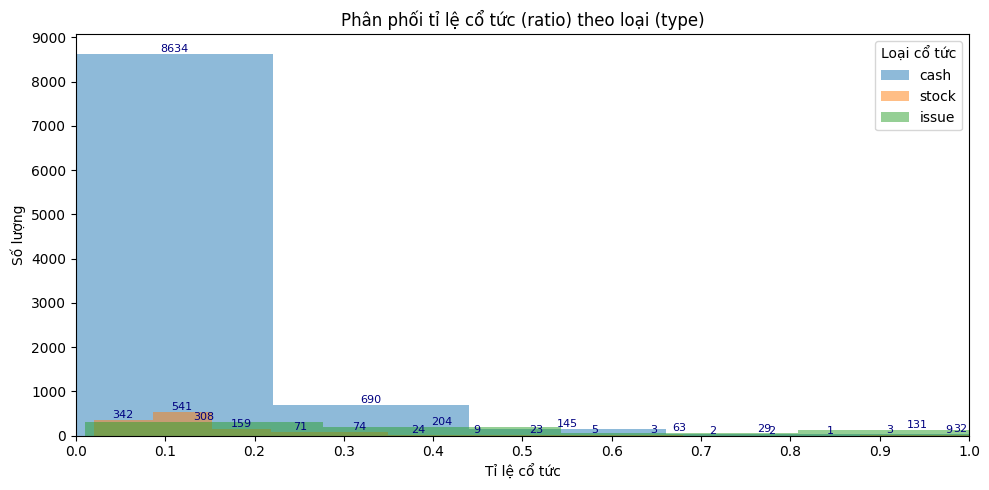

In [99]:
import re

def extract_ratio(title):
    # Tìm tỉ lệ dạng số thập phân hoặc phân số trong chuỗi
    match = re.search(r'tỉ lệ\s*([\d.,/]+)', title)
    if match:
        ratio_str = match.group(1).replace(',', '.')
        # Nếu là phân số (vd: 1/10), chuyển sang float
        if '/' in ratio_str:
            num, denom = ratio_str.split('/')
            try:
                return float(num) / float(denom)
            except Exception:
                return None
        try:
            return float(ratio_str)
        except Exception:
            return None
    return None

df['ratio'] = df['title'].apply(extract_ratio)
pd.options.display.float_format = "{:,.2f}".format
print(df[['title', 'ratio']])

# Function to add centered value labels
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')  # Aligning text at center


# Thống kê mô tả cho cột 'ratio'
print("Phân phối thống kê tỉ lệ cổ tức (ratio):")
print(df['ratio'].describe())

# Vẽ histogram cho cột 'ratio'
plt.figure(figsize=(10, 5))
for t in df['type'].unique():
    subset = df[df['type'] == t]
    values, bins, bars = plt.hist(subset['ratio'].dropna(), bins=30, alpha=0.5, label=t)
    plt.bar_label(bars, fontsize=8, color='navy')
plt.title('Phân phối tỉ lệ cổ tức (ratio) theo loại (type)')
plt.xlabel('Tỉ lệ cổ tức')
plt.ylabel('Số lượng')
plt.legend(title='Loại cổ tức')
plt.xlim(0, 1)
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.yticks(range(0, 10000, 1000))
plt.tight_layout()
plt.show()

Phân tích mức độ chia cổ tức thường xuyên của công ty theo quý, theo năm

- Thống kê số lần trả cổ tức của từng công ty (symbol) theo quý và theo năm giúp xác định các doanh nghiệp có chính sách cổ tức đều đặn, ổn định.
- Những công ty có số lần trả cổ tức cao và đều qua các quý, các năm thường là lựa chọn ưu tiên cho nhà đầu tư theo chiến lược nhận cổ tức định kỳ.
- Việc theo dõi tần suất chia cổ tức giúp nhà đầu tư nhận diện các doanh nghiệp có dòng tiền ổn định, minh bạch và chính sách cổ tức hấp dẫn.
- Doanh nghiệp có thể sử dụng thống kê này để so sánh với các đối thủ cùng ngành, từ đó điều chỉnh chính sách cổ tức nhằm tăng sức hút với nhà đầu tư.
- Thống kê này cũng phản ánh xu hướng chung của thị trường về mức độ ổn định trong việc chi trả cổ tức của các doanh nghiệp niêm yết.

Trực quan hóa đề xuất:
- Biểu đồ cột: Top công ty trả cổ tức nhiều nhất theo quý, theo năm.
- Biểu đồ heatmap: Tần suất trả cổ tức của từng công ty theo từng quý/năm.

/var/folders/g0/9gh4zg0s4_1f3kfgmq5dt3_c0000gn/T/ipykernel_12636/1093575432.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_year.index, y=top_year.values, palette='magma')


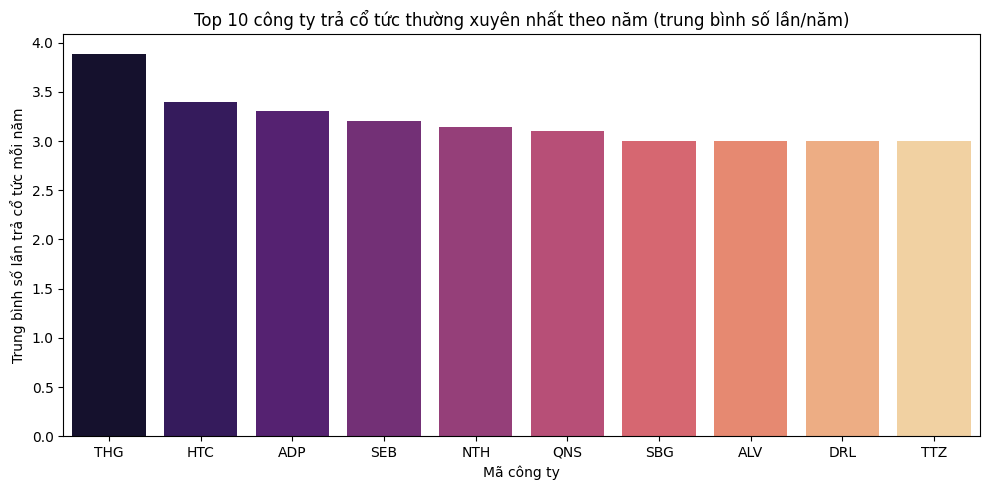

In [79]:
import seaborn as sns

# Đảm bảo cột exright_date đã được chuyển sang datetime
df['exright_date'] = pd.to_datetime(df['exright_date'])
df['year'] = df['exright_date'].dt.year
df['quarter'] = df['exright_date'].dt.quarter

# Thống kê số lần trả cổ tức của từng công ty theo quý và theo năm
dividend_count_by_company_quarter = (
    df.groupby(['symbol', 'year', 'quarter'])
    .size()
    .reset_index(name='count')
)

dividend_count_by_company_year = (
    df.groupby(['symbol', 'year'])
    .size()
    .reset_index(name='count')
)

# # Hiển thị top 10 công ty trả cổ tức nhiều nhất theo quý (trung bình mỗi quý)
# top_quarter = (
#     dividend_count_by_company_quarter.groupby('symbol')['count']
#     .mean()
#     .sort_values(ascending=False)
#     .head(10)
# )
# print("Top 10 công ty trả cổ tức thường xuyên nhất theo quý (trung bình số lần/quý):")
# print(top_quarter)

# plt.figure(figsize=(10, 5))
# sns.barplot(x=top_quarter.index, y=top_quarter.values, palette='viridis')
# plt.title('Top 10 công ty trả cổ tức thường xuyên nhất theo quý (trung bình số lần/quý)')
# plt.xlabel('Mã công ty')
# plt.ylabel('Trung bình số lần trả cổ tức mỗi quý')
# plt.tight_layout()
# plt.show()

# Hiển thị top 10 công ty trả cổ tức nhiều nhất theo năm (trung bình mỗi năm)
top_year = (
    dividend_count_by_company_year.groupby('symbol')['count']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
# print("Top 10 công ty trả cổ tức thường xuyên nhất theo năm (trung bình số lần/năm):")
# print(top_year)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_year.index, y=top_year.values, palette='magma')
plt.title('Top 10 công ty trả cổ tức thường xuyên nhất theo năm (trung bình số lần/năm)')
plt.xlabel('Mã công ty')
plt.ylabel('Trung bình số lần trả cổ tức mỗi năm')
plt.tight_layout()
plt.show()

Dự đoán số lượng công ty trả cổ tức trong năm 2026: 871


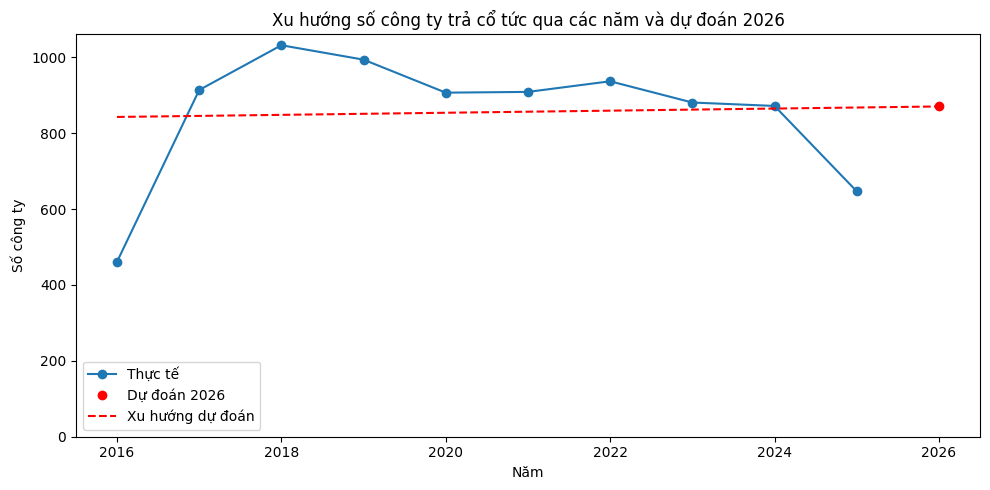

In [75]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Dự đoán xu hướng số lượng công ty trả cổ tức trong năm tới (2026)

# Chuẩn bị dữ liệu: số công ty trả cổ tức theo từng năm
companies_by_year = df.groupby('year')['symbol'].nunique().reset_index()

# X và y cho mô hình hồi quy tuyến tính
X = companies_by_year['year'].values.reshape(-1, 1)
y = companies_by_year['symbol'].values

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X, y)

# Dự đoán cho năm 2026
year_predict = np.array([[2026]])
predicted_companies = model.predict(year_predict)[0]

print(f"Dự đoán số lượng công ty trả cổ tức trong năm 2026: {predicted_companies:.0f}")

# Vẽ biểu đồ xu hướng và điểm dự đoán
plt.figure(figsize=(10, 5))
plt.plot(companies_by_year['year'], companies_by_year['symbol'], marker='o', label='Thực tế')
plt.plot(2026, predicted_companies, 'ro', label='Dự đoán 2026')
plt.plot(
    np.append(companies_by_year['year'].values, 2026),
    model.predict(np.append(companies_by_year['year'].values, 2026).reshape(-1, 1)),
    'r--', label='Xu hướng dự đoán'
)
plt.title('Xu hướng số công ty trả cổ tức qua các năm và dự đoán 2026')
plt.xlabel('Năm')
plt.ylabel('Số công ty')
plt.legend()
plt.ylim(0)
plt.tight_layout()
plt.show()